In [269]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
world_df = pd.read_csv("../data/full_data.csv", index_col=0, low_memory=False)

In [3]:
world_df.head()

,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
eventid,,,,,,,,,,,,,,,,,,,,,
197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [4]:
usa_df = world_df[world_df["country_txt"] == "United States"].copy()

* Years that had most attacks

In [5]:
usa_df["iyear"].value_counts()

iyear
1970    468
1971    247
1975    149
1977    130
1976    105
2020    103
1974     94
1978     87
1982     77
2018     76
1981     74
2019     72
1979     69
2016     68
1972     68
1980     67
2017     66
1984     63
1995     60
1973     58
1994     55
1999     54
1986     49
2001     47
1983     44
1989     42
1997     42
2000     42
2015     41
1985     40
1996     35
2003     35
1987     34
2002     33
1992     32
1990     32
1991     31
1998     31
2014     29
1988     27
2005     21
2012     20
2013     20
2010     19
2008     18
2009     12
2007     11
2011      9
2004      9
2006      6
Name: count, dtype: int64

* Amount of terrorist attacks recorded

In [6]:
len(usa_df)

3121

In [26]:
usa_df.sample()

,year,month,day,approxdate,extended,resolution,country,country_txt,region,region_txt,...,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related,date
eventid,,,,,,,,,,,,,,,,,,,,,
197205190004,1972,5,19,NaN,0,NaN,217,United States,1,North America,...,"""Valencia High Damaged by Fire Bombing,"" Los A...","Ramon G. McLeod, ""Bombing 2nd This Week in Sou...",NaN,Hewitt Project,0,0,0,0,NaN,1972-05-19


In [8]:
usa_df[["iday", "imonth", "iyear"]].sample()

,iday,imonth,iyear
eventid,,,
197502030002,3,2,1975


In [9]:
usa_df.rename(columns={"iday": "day", "imonth": "month", "iyear": "year"}, inplace=True)

In [14]:
for data in usa_df[["day","month","year"]].values:
    print(data)

[   1    1 1970]
[   2    1 1970]
[   2    1 1970]
[   3    1 1970]
[   1    1 1970]
[   6    1 1970]
[   9    1 1970]
[   9    1 1970]
[  12    1 1970]
[  12    1 1970]
[  13    1 1970]
[  14    1 1970]
[  19    1 1970]
[  19    1 1970]
[  19    1 1970]
[  22    1 1970]
[  25    1 1970]
[  25    1 1970]
[  26    1 1970]
[  26    1 1970]
[  27    1 1970]
[  28    1 1970]
[  30    1 1970]
[  30    1 1970]
[  30    1 1970]
[  31    1 1970]
[   1    2 1970]
[   1    2 1970]
[   2    2 1970]
[   3    2 1970]
[   3    2 1970]
[   4    2 1970]
[   6    2 1970]
[   6    2 1970]
[   6    2 1970]
[   6    2 1970]
[   6    2 1970]
[   6    2 1970]
[   6    2 1970]
[   7    2 1970]
[   8    2 1970]
[   8    2 1970]
[   9    2 1970]
[   9    2 1970]
[  11    2 1970]
[  13    2 1970]
[  13    2 1970]
[  15    2 1970]
[  15    2 1970]
[  16    2 1970]
[  16    2 1970]
[  16    2 1970]
[  16    2 1970]
[  17    2 1970]
[  17    2 1970]
[  17    2 1970]
[  17    2 1970]
[  18    2 1970]
[  18    2 197

In [15]:
usa_df["date"] = pd.to_datetime(usa_df[["year", "month","day"]], errors="coerce")

In [80]:
usa_df[usa_df["claimed"] == 1][["provstate", "city", "vicinity",
                               "location", "attacktype1_txt", "success",
                               "suicide", "weaptype1_txt", "targtype1_txt",
                               "targsubtype1_txt", "target1", "natlty1_txt",
                               "corp1", "gname", "gsubname", "guncertain1",
                                        "individual", "nperps", "nperpcap",
                                        "claimed", "nkill"]]

,provstate,city,vicinity,location,attacktype1_txt,success,suicide,weaptype1_txt,targtype1_txt,targsubtype1_txt,target1,natlty1_txt,corp1,gname,gsubname,guncertain1,individual,nperps,nperpcap,claimed
eventid,,,,,,,,,,,,,,,,,,,,
197001020003,Wisconsin,Madison,0,NaN,Facility/Infrastructure Attack,1,0,Incendiary,Military,Military Recruiting Station/Academy,"R.O.T.C. offices at University of Wisconsin, M...",United States,R.O.T.C.,New Year's Gang,NaN,0.0,0,1.0,1.0,1.0
197001090002,Puerto Rico,Rio Piedras,0,Caparra Shopping Center,Facility/Infrastructure Attack,1,0,Incendiary,Business,Retail/Grocery/Bakery,Baker's Store,United States,American owned business in Puerto Rico,Armed Commandos of Liberation,NaN,1.0,0,-99.0,-99.0,1.0
197002060004,Puerto Rico,Dorado,0,NaN,Facility/Infrastructure Attack,1,0,Incendiary,Government (General),Government Building/Facility/Office,Selective Service office in Dorado Puerto Rico,United States,Selective Service,Armed Revolutionary Independence Movement (MIRA),NaN,0.0,0,-99.0,-99.0,1.0
197002060005,Puerto Rico,Rio Piedras,0,NaN,Facility/Infrastructure Attack,1,0,Incendiary,Utilities,Electricity,NaN,United States,General Electric,Armed Revolutionary Independence Movement (MIRA),NaN,0.0,0,-99.0,-99.0,1.0
197002060006,Puerto Rico,Carolina,0,Isla Verde district,Facility/Infrastructure Attack,1,0,Incendiary,Business,Hotel/Resort,San Juan Hotel,Puerto Rico,Hotel,Armed Revolutionary Independence Movement (MIRA),NaN,0.0,0,-99.0,-99.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202010190027,Texas,Houston,0,The incident occurred along Almeda Genoa road.,Hostage Taking (Kidnapping),1,0,Firearms,Private Citizens & Property,Named Civilian,Vehicle of Repair Worker: David Lopez Zuniga,United States,Not Applicable,Conspiracy theory extremists,NaN,0.0,0,1.0,1.0,1.0
202011050035,Pennsylvania,Philadelphia,0,The incident occurred at 1101 Arch St.,Facility/Infrastructure Attack,0,0,Firearms,Government (General),Election-related,Electoral Ballot-Carrying Trucks,United States,Government of Philadelphia,Conspiracy theory extremists,NaN,0.0,1,2.0,2.0,1.0
202011080028,Washington,Seattle,0,The incident occurred in the Leschi neighborhood.,Facility/Infrastructure Attack,1,0,Incendiary,Private Citizens & Property,House/Apartment/Residence,Residences,United States,Not Applicable,Left-wing extremists,NaN,1.0,1,1.0,1.0,1.0


In [35]:
usa_df[usa_df["date"].isna()]["date"]

eventid
197005000001   NaT
197005000002   NaT
197007000001   NaT
197007000002   NaT
197107000002   NaT
197203000001   NaT
197203000002   NaT
197203000003   NaT
197403000001   NaT
197403000002   NaT
197711000005   NaT
197802000006   NaT
198005000004   NaT
198101000014   NaT
198109000002   NaT
198110000001   NaT
198112000004   NaT
198708000002   NaT
198806000001   NaT
198901000002   NaT
199011000002   NaT
199212000002   NaT
199401000001   NaT
199501000001   NaT
199501000002   NaT
199501000003   NaT
199905000002   NaT
199908000002   NaT
199908000003   NaT
200509000001   NaT
201010000001   NaT
201010000002   NaT
201011000001   NaT
Name: date, dtype: datetime64[ns]

In [83]:
usa_df[usa_df["date"] == "1971-08-22"][["provstate", "city", "vicinity",
                                        "location", "attacktype1_txt", "success", 
                                        "suicide", "weaptype1_txt", "targtype1_txt",
                                        "targsubtype1_txt", "target1", "natlty1_txt",
                                        "corp1", "gname", "gsubname", "guncertain1",
                                        "individual", "nperps", "nperpcap",
                                        "claimed", "nkill", "nkillus",
                                        "nkillter"]]

,provstate,city,vicinity,location,attacktype1_txt,success,suicide,weaptype1_txt,targtype1_txt,targsubtype1_txt,...,gname,gsubname,guncertain1,individual,nperps,nperpcap,claimed,nkill,nkillus,nkillter
eventid,,,,,,,,,,,,,,,,,,,,,
197108220001,New York,New York City,0,NaN,Bombing/Explosion,1,0,Explosives,Business,Retail/Grocery/Bakery,...,Armed Revolutionary Independence Movement (MIRA),NaN,0.0,0,NaN,NaN,NaN,0.0,NaN,NaN
197108220002,New Jersey,Hoboken,0,NaN,Facility/Infrastructure Attack,1,0,Incendiary,Business,Retail/Grocery/Bakery,...,Armed Revolutionary Independence Movement (MIRA),NaN,0.0,0,NaN,NaN,NaN,0.0,NaN,NaN
197108220003,New York,New York City,0,NaN,Bombing/Explosion,1,0,Explosives,Business,Retail/Grocery/Bakery,...,Armed Revolutionary Independence Movement (MIRA),NaN,0.0,0,NaN,NaN,NaN,0.0,NaN,NaN
197108220004,New York,New York City,0,NaN,Bombing/Explosion,1,0,Explosives,Business,Retail/Grocery/Bakery,...,Armed Revolutionary Independence Movement (MIRA),NaN,0.0,0,NaN,NaN,NaN,0.0,NaN,NaN
197108220005,New York,New York City,0,NaN,Bombing/Explosion,1,0,Explosives,Business,Retail/Grocery/Bakery,...,Armed Revolutionary Independence Movement (MIRA),NaN,0.0,0,NaN,NaN,NaN,0.0,NaN,NaN
197108220006,New York,New York City,0,NaN,Bombing/Explosion,1,0,Explosives,Business,Retail/Grocery/Bakery,...,Armed Revolutionary Independence Movement (MIRA),NaN,0.0,0,NaN,NaN,NaN,0.0,NaN,NaN
197108220007,New York,New York City,0,NaN,Bombing/Explosion,1,0,Explosives,Business,Retail/Grocery/Bakery,...,Armed Revolutionary Independence Movement (MIRA),NaN,0.0,0,NaN,NaN,NaN,0.0,NaN,NaN
197108220008,New York,New York City,0,NaN,Bombing/Explosion,1,0,Explosives,Business,Retail/Grocery/Bakery,...,Armed Revolutionary Independence Movement (MIRA),NaN,0.0,0,NaN,NaN,NaN,0.0,NaN,NaN
197108220009,New York,New York City,0,NaN,Bombing/Explosion,1,0,Explosives,Business,Retail/Grocery/Bakery,...,Armed Revolutionary Independence Movement (MIRA),NaN,0.0,0,NaN,NaN,NaN,0.0,NaN,NaN


* Amount of successful attacks per type

<Axes: title={'center': 'Total Attacks vs Succesful Attacks (USA) 1970 - 2020'}, xlabel='Count', ylabel='Attack Type'>

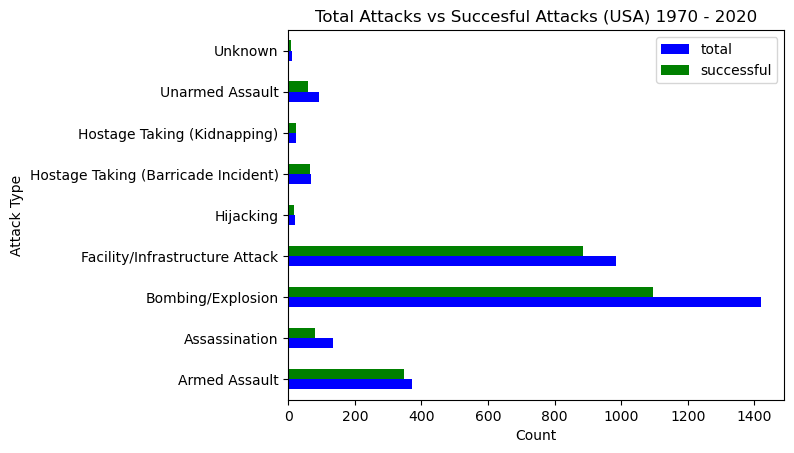

In [123]:
total_attacks = usa_df.groupby("attacktype1_txt")["success"].count()
succ_attacks = usa_df[usa_df["success"] == 1].groupby("attacktype1_txt")["success"].count()
df = pd.DataFrame({"total": total_attacks.values,
                   "successful": succ_attacks.values}, index=total_attacks.index)
df.plot.barh(title="Total Attacks vs Succesful Attacks (USA) 1970 - 2020", ylabel="Attack Type", xlabel="Count", color={"successful": "green", "total": "blue"})

* Attack Type Per group

In [221]:
usa_df.groupby(["gname", "attacktype1_txt"])[
    "gname"].count().sort_values(ascending=False)

gname                                          attacktype1_txt               
Unknown                                        Bombing/Explosion                 290
                                               Facility/Infrastructure Attack    199
Anti-Abortion extremists                       Facility/Infrastructure Attack    188
Fuerzas Armadas de Liberacion Nacional (FALN)  Bombing/Explosion                 112
Left-Wing Militants                            Bombing/Explosion                  93
                                                                                ... 
Arabs                                          Unarmed Assault                     1
Antonia Martinez Student Commandos (AMSC)      Bombing/Explosion                   1
Anti-globalization extremists                  Hostage Taking (Kidnapping)         1
Medellin Drug Cartel                           Assassination                       1
Action Squad                                   Facility/Infrastructure A

* Bombings timeline

<Axes: title={'center': 'Attacks over time'}, xlabel='year'>

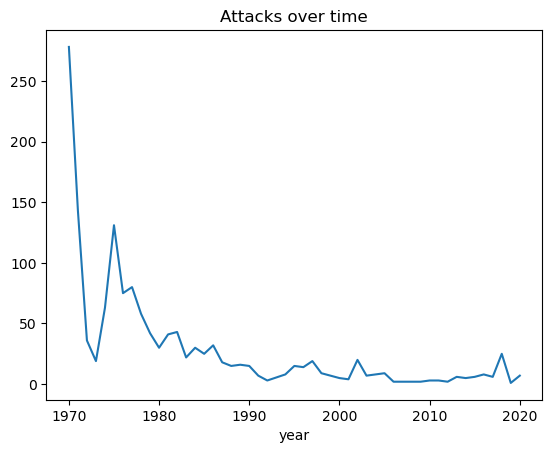

In [324]:
bombings = usa_df[usa_df["attacktype1_txt"].str.match("Bombing/Explosion")]
bombing_plot_data = bombings.groupby("year")[
    "year"].count()
# anually = bombing_plot_data.resample("A").count()
bombing_plot_data.plot.line(title="Attacks over time")

* Top 5 groups doing the bombings

In [354]:
bombings[bombings["year"] == 1970].groupby("gname")["gname"].count().sort_values(ascending=False).iloc[:10]

gname
Left-Wing Militants                                 57
Unknown                                             53
Black Nationalists                                  33
Student Radicals                                    22
Weather Underground, Weathermen                     20
Strikers                                            18
White supremacists/nationalists                     16
Black Panthers                                      13
Armed Commandos of Liberation                       10
Armed Revolutionary Independence Movement (MIRA)     6
Name: gname, dtype: int64

* What does the Left-Wing Militants target?

In [346]:
bombings[bombings["gname"].str.match(
    "Left-Wing Militants")].groupby(["targtype1_txt", "targsubtype1_txt"])[["targtype1_txt"]].count()

targtype1_txt
targtype1_txt               targsubtype1_txt                                                 
Business                    Bank/Commerce                                                  22
                            Construction                                                    1
                            Medical/Pharmaceutical                                          1
                            Multinational Corporation                                       4
                            Retail/Grocery/Bakery                                           2
Government (General)        Government Building/Facility/Office                            15
                            Government Personnel (excluding police, military)               1
                            Head of State                                                   1
                            Judge/Attorney/Court                                            4
Military                    Military Barracks/Base/Headquarters/Checkpost                  19
                            Military Recruiting Station/Academy                             7
                            Military Transportation/Vehicle (excluding conv...              3
Police                      Police Building (headquarters, station, school)                 2
                            Police Patrol (including vehicles and convoys)                  3
Private Citizens & Property Public Area (garden, parking lot, garage, beach...              1
                            Vehicles/Transportation                                         3
Utilities                   Electricity                                                     1
                            Oil                                                             1

* All of the bombings done by subgroups

In [372]:
bombings[bombings["gsubname"].notna()]["gsubname"]

eventid
197010080002           Perfect Park Home Garden Society
197511270002                             Cuban Power 76
197604220004     Sam Melville and Jonathan Jackson Unit
197703120005     Sam Melville and Jonathan Jackson Unit
197810270006     Sam Melville and Jonathan Jackson Unit
197810270007     Sam Melville and Jonathan Jackson Unit
197902270004     Sam Melville and Jonathan Jackson Unit
198105260005       Confederate Vigilante Knights of KKK
198207050001                           Militant Faction
198311070001                      Armed Resistance Unit
198404050001                   Red Guerrilla Resistance
198404200006    Guerrilla Resistance in support of FMLN
198409260002                       Guerrilla Resistance
198502230001                   Red Guerrilla Resistance
Name: gsubname, dtype: object